# Preprocessing

In this notebook, we will be preprocessing the data for machine learning models.

***

# Import libraries + Scripts

In [40]:
# Setting PYTHONHASHSEED
# Run this block, then restart the kernel
import os

os.environ['PYTHONHASHSEED'] = '0'

In [1]:
# TESTING PYTHONHASHSEED
assert(hash('hi') == hash('hi'))

In [2]:
# Importing libraries
import sys
import os
from pathlib import Path

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno

# Setting seed
np.random.seed(42)

# To importing script
sys.path.append('./py_scripts')
import A_eda as A

# Importing functions from A
from A_eda import plt_show

In [3]:
# Importing data + variables
adclicks = A.adclicks
categoricals = A.categoricals

***

# Data Cleaning

We will be performing necessary data transformations and handling missing data in this section.

In [33]:
# Checking all the missing values
missing_values = adclicks[adclicks.isnull().any(axis=1)]
missing_values

,id,age,gender,device_type,ad_position,browsing_history,time_of_day,click
7529,5301,NaN,Male,Tablet,NaN,NaN,Night,1
3527,3150,NaN,Male,Desktop,NaN,NaN,Afternoon,0
9113,7866,51.0,NaN,Mobile,NaN,Social Media,Morning,1
6157,9789,36.0,NaN,Tablet,NaN,NaN,Morning,1
9130,8115,NaN,NaN,Mobile,Top,NaN,Afternoon,1
...,...,...,...,...,...,...,...,...
1822,7558,NaN,NaN,NaN,Top,Social Media,Night,1
1334,8948,25.0,NaN,Mobile,Bottom,Education,Evening,1
8317,3144,24.0,Male,Desktop,Side,Shopping,NaN,1
4162,4756,59.0,Non-Binary,Mobile,NaN,Education,Evening,1


Almost all of our rows (7361 out of 8000) are missing one or more features. A possible method of imputation is the MICE (Multivariate Imputation of Chained Equations), but it is best suited for data that is MAR (Missing At Random). Let us check this assumption below:

***

## Checking data is MAR/MCAR

Before we impute using MICE, let's confirm the assumption that our data is MAR/MCAR.

/Users/ellielee/Desktop/data-science/projects/ad-click-pred/py_scripts/A_eda.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


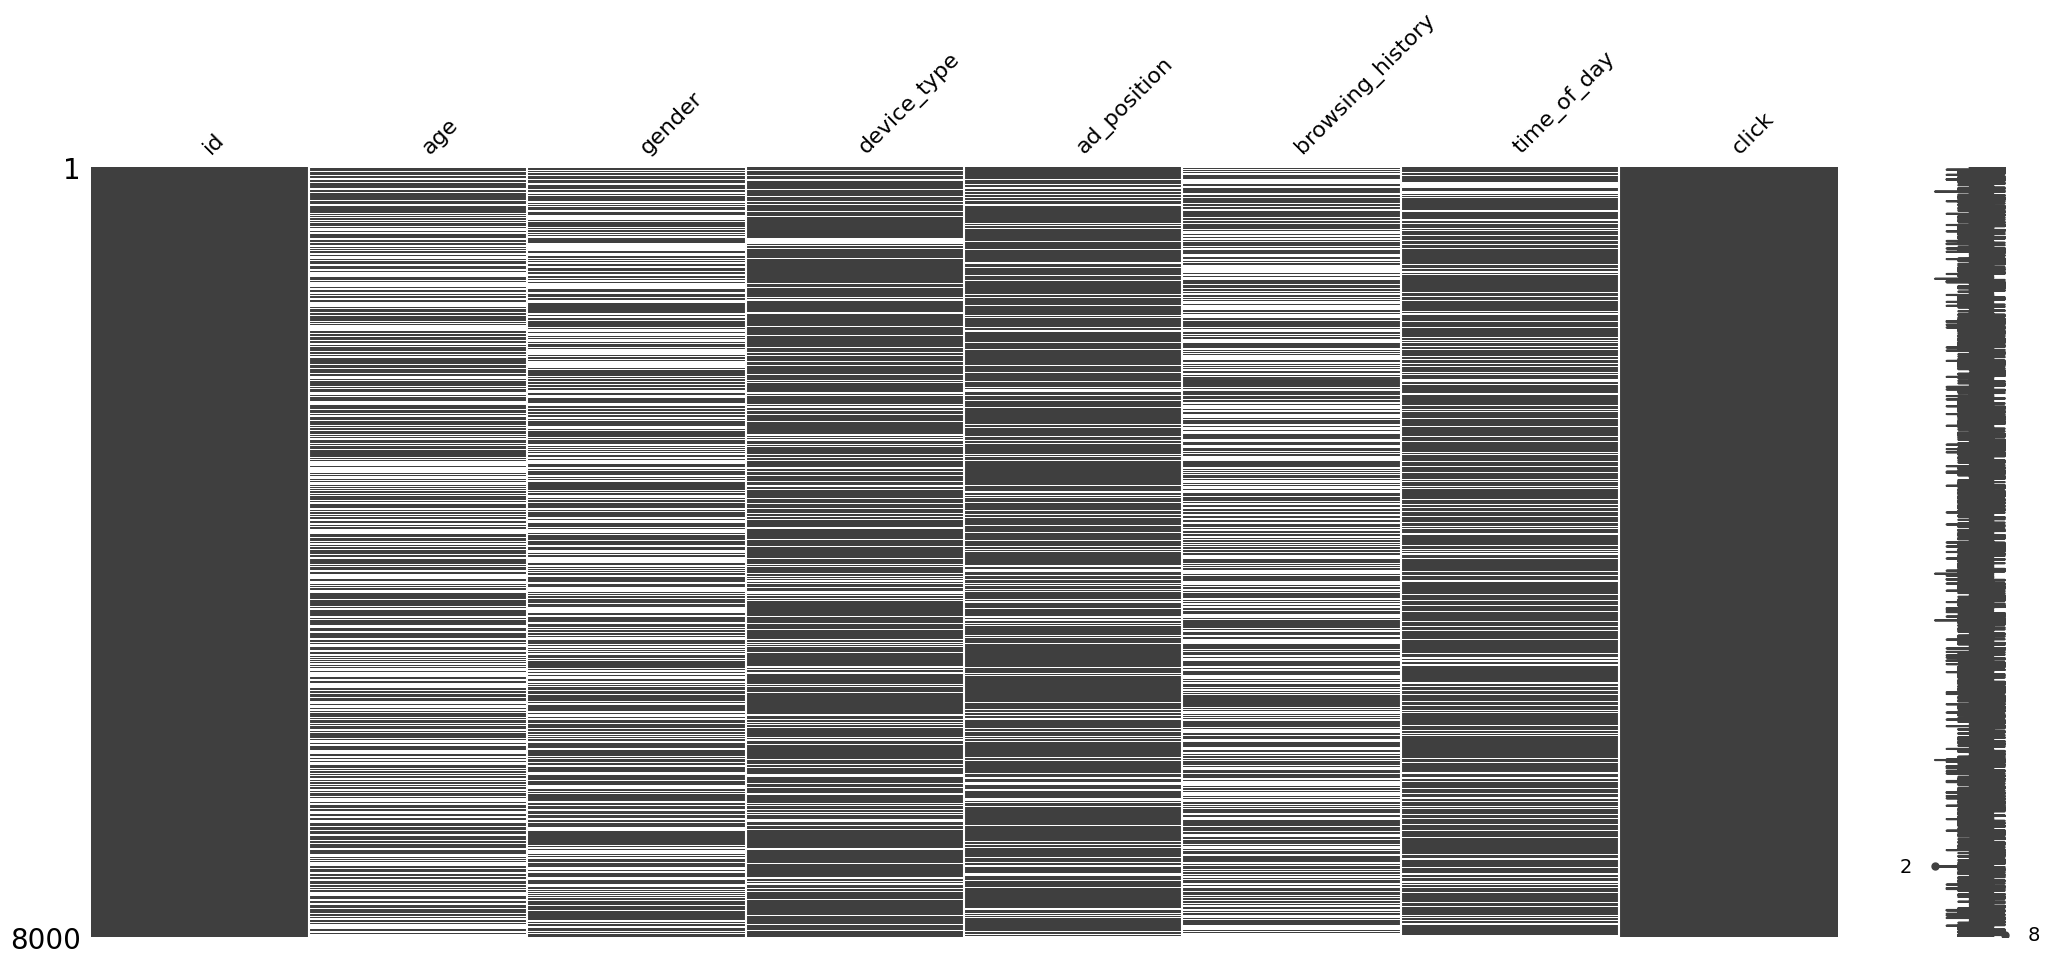

In [34]:
# Checking that data is MCAR/MAR
msno.matrix(adclicks)
plt_show('missing_matrix')

Based on the matrix, it appears that the missingness is random. We can get further confirmation by generating a heatmap that measures nullity correlation.

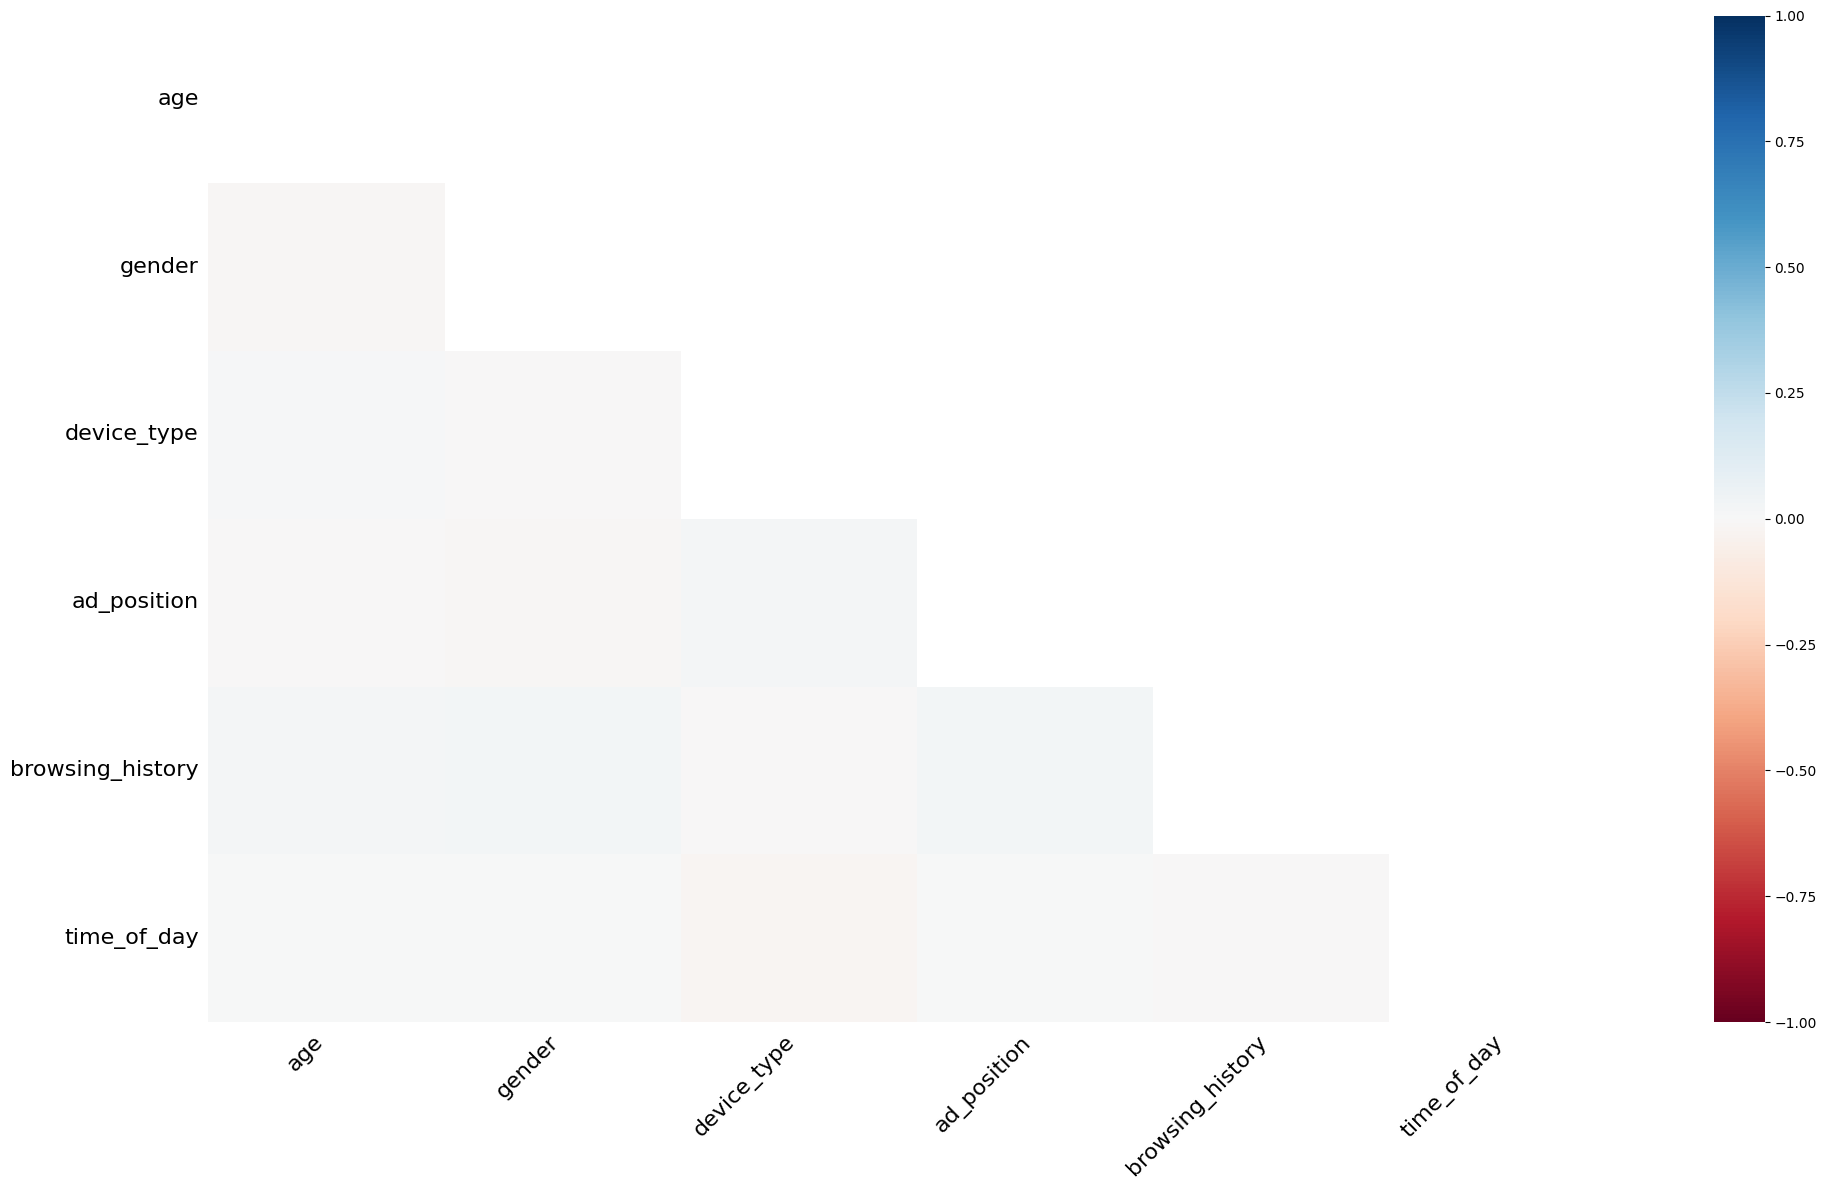

In [35]:
# Heatmap for nullity correlation
msno.heatmap(adclicks)
plt_show('nullity_corr_heatmap')

With this heatmap, we can get clear confirmation that our data is MAR, as we see that there is little to no correlation in any of the relationships.

***

## Imputing with MICE

Next, we will be imputing our missing values using the MICE method.

In [ ]:
# Imputing with IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# Encode each categorical attribute
